# **MENS PERFUME**

## **Praproses Data**

1. Setup Kebutuhan Hehe

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

2. Buah list x dan y kemudian plot dalam diagram titik

In [ ]:
data = pd.read_csv('ebay_mens_perfume.csv')
data.head()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States"
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada"
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States"
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,44.99,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States"
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States"


In [ ]:
data.isnull().sum()

,0
brand,1
title,0
type,3
price,0
priceWithCurrency,0
available,111
availableText,3
sold,6
lastUpdated,53
itemLocation,0


In [ ]:
data['lastUpdated'] = pd.to_datetime('now')

data['available'] = np.where(data['available'] == 'NaN','0', data['available'])
data['sold'] = np.where(data['sold'] == 'NaN','0', data['sold'])
# data['type'] = np.where(data['type'] == 'NaN','/', data['type'])
# data['brand'] = np.where(data['brand'] == 'NaN','-', data['brand'])

# print(data['type'].unique())
# data.isnull().sum()

for kolom in data.columns :
  if data[kolom].dtype == 'object' :
    data[kolom].fillna('-', inplace=True)

data.isnull().sum()

<ipython-input-63-bcc30b1c6402>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[kolom].fillna('-', inplace=True)


,0
brand,0
title,0
type,0
price,0
priceWithCurrency,0
available,0
availableText,0
sold,0
lastUpdated,0
itemLocation,0


In [ ]:
data.head()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,2024-12-06 12:27:57.995651,"Allen Park, Michigan, United States"
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,2024-12-06 12:27:57.995651,"Atlanta, Georgia, Canada"
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,2024-12-06 12:27:57.995651,"Dearborn, Michigan, United States"
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,44.99,US $44.99/ea,2.0,2 available / 159 sold,159.0,2024-12-06 12:27:57.995651,"Reinholds, Pennsylvania, United States"
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,nan,Limited quantity available / 156 sold,156.0,2024-12-06 12:27:57.995651,"Brooklyn, New York, United States"


## **Klasterisasi**

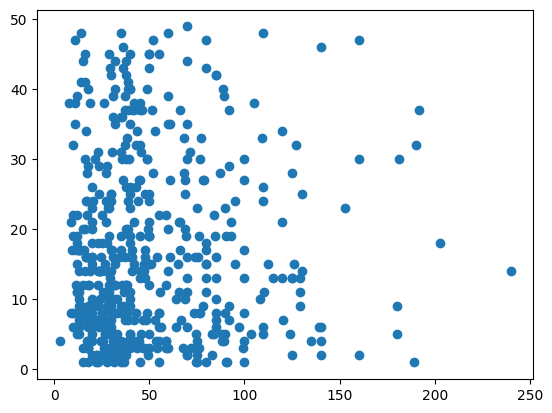

In [ ]:
# Assuming your data is a list of tuples like [(price, sold), ...]
# First, convert the list to a Pandas DataFrame
data = pd.DataFrame(data, columns=['price', 'sold'])

# Convert 'sold' column to numeric, handling errors
data['sold'] = pd.to_numeric(data['sold'], errors='coerce')

# Now, you can perform the filtering and plotting operations:
data = data[data['sold'] < 50.0] # Now this line works since data is a dataframe

x=data['price'].to_numpy()
y=data['sold'].to_numpy()
plt.scatter(x,y)
plt.show()

3. Gabungkan data x dan y dalam menggunakan zip():

In [ ]:
data = list(zip(x,y))
data

[(109.99, 48.0),
 (100.0, 27.0),
 (30.99, 39.0),
 (85.0, 6.0),
 (15.89, 17.0),
 (68.99, 20.0),
 (37.99, 44.0),
 (83.95, 22.0),
 (35.99, 43.0),
 (92.99, 19.0),
 (87.99, 4.0),
 (119.99, 34.0),
 (99.99, 30.0),
 (51.91, 47.0),
 (54.99, 8.0),
 (40.99, 37.0),
 (39.0, 24.0),
 (69.99, 44.0),
 (60.99, 35.0),
 (47.88, 25.0),
 (25.99, 3.0),
 (22.5, 2.0),
 (15.03, 44.0),
 (26.5, 3.0),
 (35.71, 36.0),
 (126.99, 32.0),
 (159.99, 30.0),
 (89.99, 23.0),
 (109.99, 24.0),
 (15.89, 8.0),
 (59.99, 14.0),
 (85.0, 42.0),
 (29.99, 17.0),
 (49.99, 45.0),
 (24.5, 4.0),
 (49.96, 19.0),
 (54.99, 22.0),
 (189.99, 32.0),
 (125.0, 28.0),
 (15.99, 14.0),
 (40.99, 16.0),
 (58.99, 3.0),
 (65.97, 37.0),
 (36.68, 9.0),
 (20.0, 23.0),
 (59.99, 20.0),
 (79.99, 18.0),
 (37.5, 30.0),
 (65.68, 11.0),
 (89.99, 5.0),
 (28.99, 23.0),
 (60.99, 27.0),
 (41.99, 38.0),
 (99.99, 8.0),
 (48.0, 7.0),
 (45.68, 5.0),
 (17.99, 3.0),
 (82.99, 5.0),
 (11.99, 11.0),
 (32.99, 10.0),
 (35.71, 30.0),
 (17.85, 29.0),
 (125.99, 15.0),
 (39.99, 9

4. Import library sklearn dan modul KMeans. Lakukan
pengelompokan menjadi 2 klaster dan plot dalam diagram
titik:

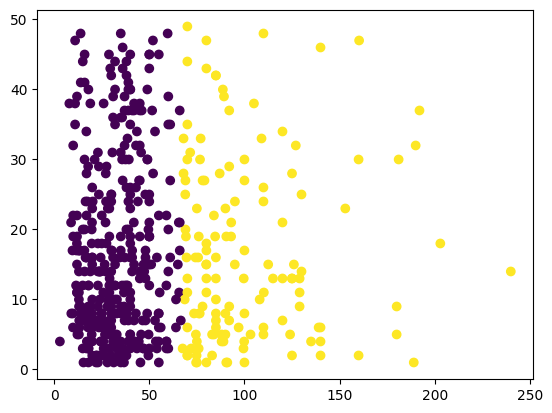

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans (n_clusters = 2)
kmeans.fit(data)
plt.scatter(x,y, c=kmeans.labels_)
plt.show()

5. Buat dataframe yang menampilkan nilai x dan y dan hasil
klaster dari k-means!

In [ ]:
data2cluster = pd.DataFrame(data, columns = ['x','y'])
data2cluster ['Cluster'] = kmeans.labels_
data2cluster

,x,y,Cluster
0,109.99,48.0,1
1,100.00,27.0,1
2,30.99,39.0,0
3,85.00,6.0,1
4,15.89,17.0,0
...,...,...,...
492,73.52,8.0,1
493,27.99,24.0,0
494,30.58,31.0,0
495,9.99,22.0,0


6. Tampilkan diagram boxplot hasil pengelompokan data
berdasarkan nilai x:

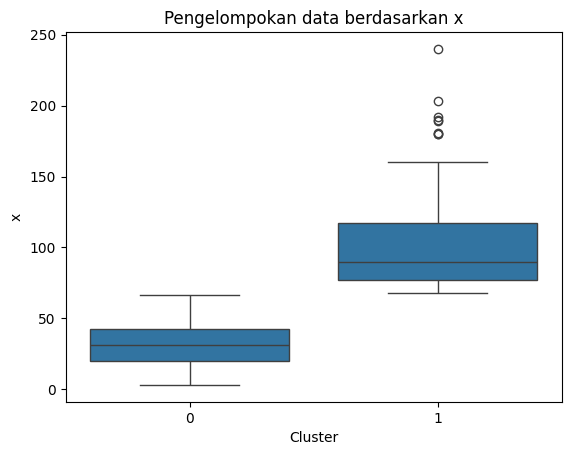

In [ ]:
sns.boxplot(x = 'Cluster', y = 'x', data = data2cluster).set_title('Pengelompokan data berdasarkan x')
plt.show()

7. Tampilkan diagram boxplot hasil pengelompokan data
berdasarkan nilai y:

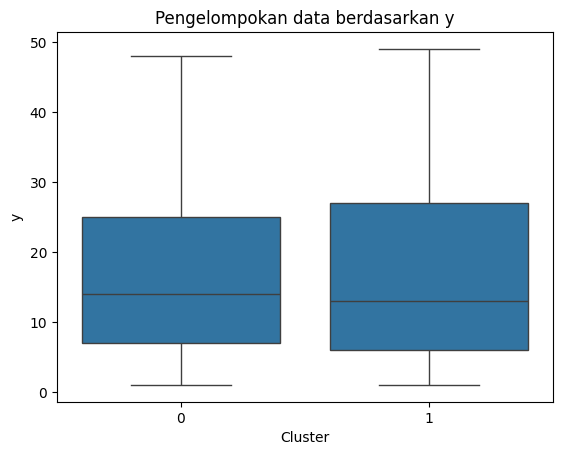

In [ ]:
sns.boxplot(x = 'Cluster', y = 'y', data = data2cluster).set_title('Pengelompokan data berdasarkan y')
plt.show()

8. Lakukan pengelompokan kembali menjadi 3 klaster dan
plot dalam diagram titik:

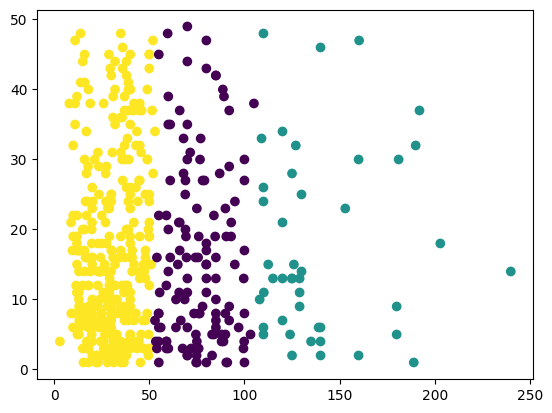

In [ ]:
kmeans = KMeans (n_clusters= 3)
kmeans.fit(data)
plt.scatter(x,y, c=kmeans.labels_)
plt.show()

9. Buat dataframe yang menampilkan nilai x dan y dan hasil
klaster dari k-means!

In [ ]:
data3cluster=pd.DataFrame(data,columns=['x','y'])
data3cluster['Cluster']=kmeans.labels_
data3cluster

,x,y,Cluster
0,109.99,48.0,1
1,100.00,27.0,0
2,30.99,39.0,2
3,85.00,6.0,0
4,15.89,17.0,2
...,...,...,...
492,73.52,8.0,0
493,27.99,24.0,2
494,30.58,31.0,2
495,9.99,22.0,2


10. Tampilkan diagram boxplot hasil pengelompokan data
berdasarkan nilai x:

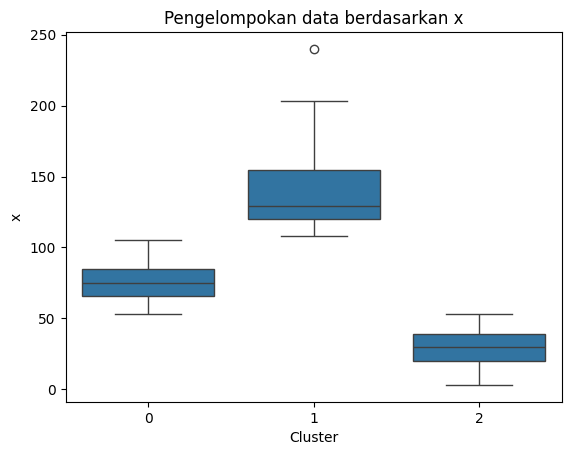

In [ ]:
sns.boxplot(x='Cluster',y='x',data=data3cluster).set_title('Pengelompokan data berdasarkan x')
plt.show()

11. Tampilkan diagram boxplot hasil pengelompokan data
berdasarkan nilai y:

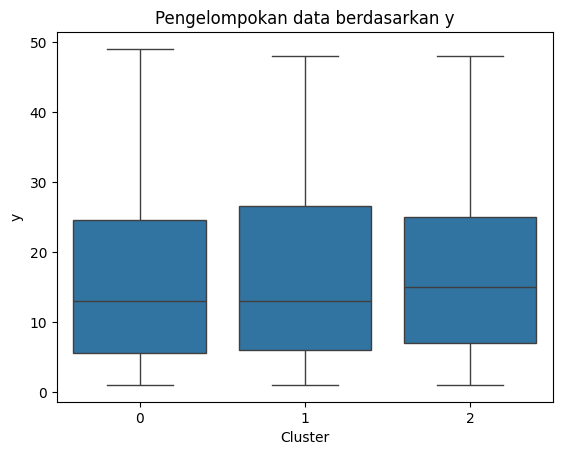

In [ ]:
sns.boxplot(x='Cluster',y='y',data=data3cluster).set_title('Pengelompokan data berdasarkan y')
plt.show()

12. Lakukan pengelompokan kembali menjadi 4 klaster dan
plot dalam diagram titik:

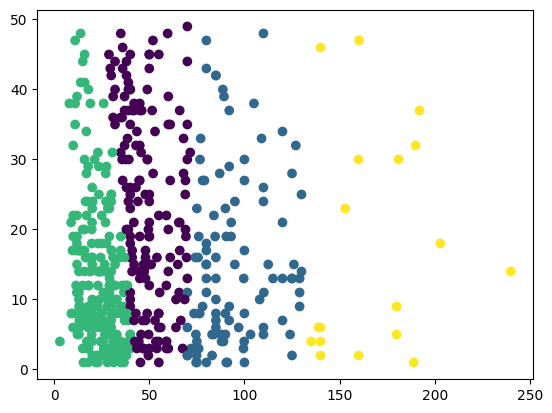

In [ ]:
kmeans =KMeans (n_clusters= 4)
kmeans.fit(data)
plt.scatter(x,y,c=kmeans.labels_)
plt.show()

13. Buat dataframe yang menampilkan nilai x dan y dan hasil
klaster dari k-means!

In [ ]:
data4cluster=pd.DataFrame(data, columns=['x','y'])
data4cluster ['Cluster']=kmeans.labels_
data4cluster

,x,y,Cluster
0,109.99,48.0,1
1,100.00,27.0,1
2,30.99,39.0,0
3,85.00,6.0,1
4,15.89,17.0,2
...,...,...,...
492,73.52,8.0,1
493,27.99,24.0,2
494,30.58,31.0,2
495,9.99,22.0,2


14. Tampilkan diagram boxplot hasil pengelompokan data
berdasarkan nilai x:

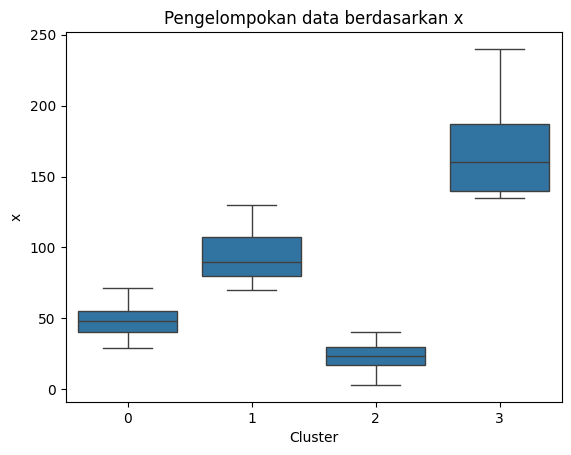

In [ ]:
sns.boxplot(x='Cluster',y='x',data=data4cluster).set_title('Pengelompokan data berdasarkan x')
plt.show()

15. Tampilkan diagram boxplot hasil pengelompokan data
berdasarkan nilai y:

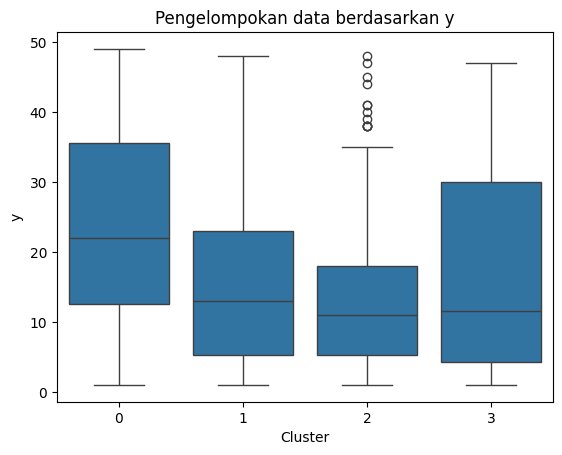

In [ ]:
sns.boxplot(x='Cluster',y='y',data=data4cluster).set_title('Pengelompokan data berdasarkan y')
plt.show()

17. Hitung nilai inertia dari setiap hasil klaster. Tampilkan nilai
inertia dalam diagram garis:

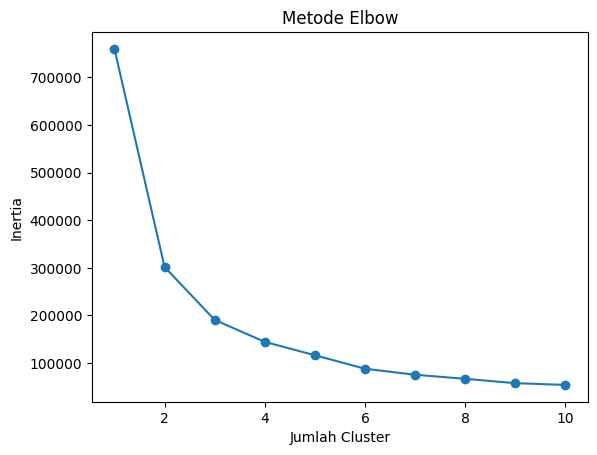

In [ ]:
inertias = []

for i in range (1,11):
  kmeans = KMeans (n_clusters= i)
  kmeans.fit(data)
  inertias.append(kmeans.inertia_)

plt.plot(range (1,11), inertias, marker = 'o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()

## **Regresi (Prediksi)**

2. Plot data ke dalam diagram scatter

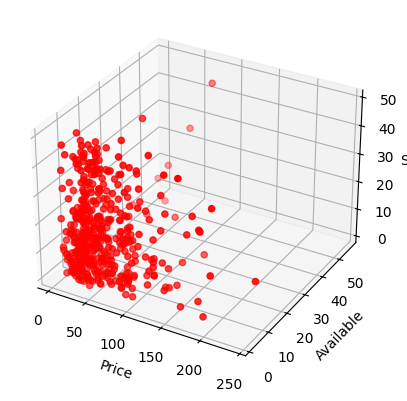

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer

# Assuming original_data holds the full data before KMeans operations
# Load or retrieve the original data
original_data = pd.read_csv('ebay_mens_perfume.csv')  # Or whatever your original data source was

# Filter and convert as needed
original_data['sold'] = pd.to_numeric(original_data['sold'], errors='coerce')
original_data = original_data[original_data['sold'] < 50.0]

# Create the DataFrame
data = pd.DataFrame(original_data, columns=['price', 'sold', 'available', 'brand', 'type'])

# Select 3 columns for plotting
x1 = data[['price', 'available', 'sold']]

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
ax.scatter3D(x1['price'], x1['available'], x1['sold'], c='r', marker='o')

# Adding labels to the axes
ax.set_xlabel('Price')
ax.set_ylabel('Available')
ax.set_zlabel('Sold')

# Show plot
plt.show()


3. Ambil nilai volume dan weight sebagai nilai x1 dan x2

In [ ]:
X = data[['price', 'available', 'brand', 'type']]
X.head()

,price,available,brand,type
1,109.99,8.0,AS SHOW,Eau de Parfum
2,100.00,10.0,Unbranded,Eau de Toilette
6,30.99,9.0,Maison Alhambra,Eau de Parfum
7,85.00,NaN,Unbranded,Eau de Parfum
8,15.89,10.0,Unbranded,/


4. Ambil nilai CO2 sebagai nilai y

In [ ]:
y = data['sold']
y.head()

,sold
1,48.0
2,27.0
6,39.0
7,6.0
8,17.0


5. Hitung nilai regresi berganda dan tampilkan

encoder data


In [ ]:
encoder = LabelEncoder()
X['brand'] = encoder.fit_transform(data['brand'])
X['type'] = encoder.fit_transform(data['type'])
# X.head()
# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # or strategy='median', 'most_frequent', 'constant'
X = imputer.fit_transform(X)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear berganda
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = model.predict(X_test)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# print(f"MAE: {mae}")
# print(f"RMSE: {rmse}")

<ipython-input-102-5b8b2cabd799>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['brand'] = encoder.fit_transform(data['brand'])
<ipython-input-102-5b8b2cabd799>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['type'] = encoder.fit_transform(data['type'])
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warni

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)
print(regr.intercept_)

[ 0.006982    0.07505102 -0.01443024  0.01254941]
17.317228485498415


6. Gunakan model regresi di no 5 untuk memprediksi sebuah
data!

In [ ]:
y_pred = regr.predict([[30.99	, 9.0, 0, 0]])
print(y_pred)

[18.2090599]
